<div style="text-align: center; font-size: 40px; font-weight: bold;">
    Masking Image
</div>

# Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Masking one image

<b>KMeans sorted labels by lightness</b>

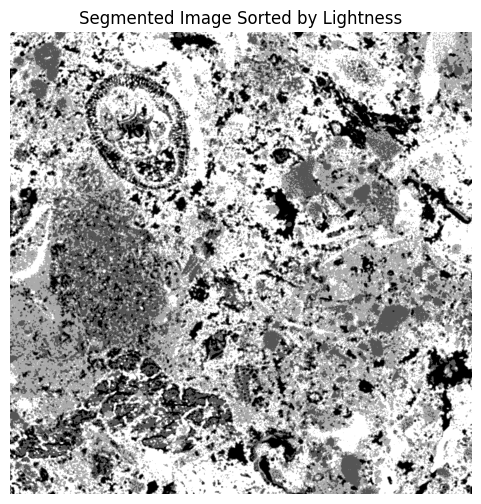

In [2]:
# Read image
image = cv2.imread('Data_enhancement/CLAHE_dlm0000.bmp')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten RGB image into a 2D array
image_2d = img_rgb.reshape((-1, 3))

# Apply K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(image_2d)
labels = kmeans.predict(image_2d)

# Convert RGB image to HLS (Hue, Lightness, Saturation)
img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)

# Extract the lightness channel
lightness = img_hls[:, :, 1]

# Calculate the average lightness for each segment
average_lightness = []
labels_2d = labels.reshape((1000, 1000))  # Convert labels to 2D

for label in range(k):
    mask_2d = (labels_2d == label)  # Mask in 2D
    avg_l = np.mean(lightness[mask_2d]) if np.any(mask_2d) else 0
    average_lightness.append((label, avg_l))

# Sort the segments by average lightness
average_lightness.sort(key=lambda x: x[1])

# Create a mapping from old labels to new labels based on lightness
sorted_labels = {old_label: new_label for new_label, (old_label, _) in enumerate(average_lightness)}

# Apply the new sorted labels to the segmented image
sorted_segmented_img = np.copy(labels_2d)
for old_label, new_label in sorted_labels.items():
    sorted_segmented_img[labels_2d == old_label] = new_label

# Display the segmented image sorted by lightness
plt.figure(figsize=(6,6))
plt.imshow(sorted_segmented_img, cmap='gray')
plt.title("Segmented Image Sorted by Lightness")
plt.axis('off')
plt.show()

<b>Select Porosity Labels as A Masking Image</b>

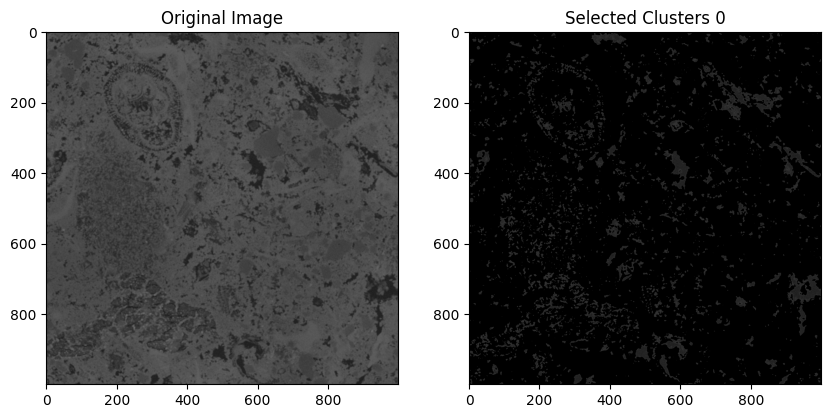

In [3]:
# Displaying results: only clusters 1 and 2
selected_clusters = [0]  # Select the desired clusters, e.g., cluster 1 and 2

# Create a mask for the selected clusters
selected_cluster_mask = np.isin(sorted_segmented_img, selected_clusters)

# Reshape the mask to match the original image dimensions
selected_cluster_mask_reshaped = selected_cluster_mask.reshape(img_rgb.shape[:2])

# Apply the mask to the image to extract the selected cluster areas
selected_cluster_image = np.copy(img_rgb)
selected_cluster_image[~selected_cluster_mask_reshaped] = 0  # Set non-selected cluster pixels to black

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(selected_cluster_image)
plt.title('Selected Clusters 0')

plt.show()


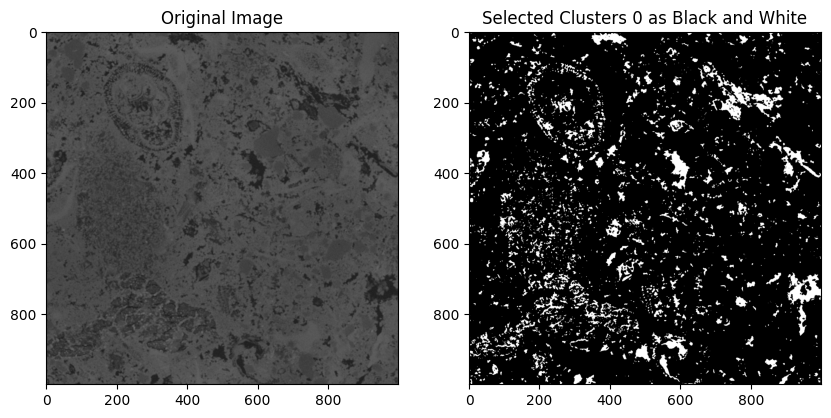

In [4]:
# Displaying results: only clusters 1 and 2
selected_clusters = [0]  # Select the desired clusters, e.g., cluster 1 and 2

# Create a mask for the selected clusters
selected_cluster_mask = np.isin(sorted_segmented_img, selected_clusters)

# Reshape the mask to match the original image dimensions
selected_cluster_mask_reshaped = selected_cluster_mask.reshape(img_rgb.shape[:2])

# Create a black-and-white image based on the mask
segmented_image = np.zeros_like(img_rgb)  # Black image
segmented_image[selected_cluster_mask_reshaped] = [255, 255, 255]  # Assign white color to the selected clusters

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Selected Clusters 0 as Black and White')
plt.show()

# Masking All of The Images

In [5]:
source_folder = "Data_enhancement"
dest_folder = "Data_mask"

# Create the destination folder if it does not exist
if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

# Get all BMP files in the source folder
image_files = [f for f in os.listdir(source_folder) if f.endswith('.bmp')]

# Loop through all images in the folder
for image_file in image_files:
    image_path = os.path.join(source_folder, image_file)
    
    # Read the image
    image = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Flatten the RGB image into a 2D array
    image_2d = img_rgb.reshape((-1, 3))
    
    # Apply K-means clustering
    k = 4
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(image_2d)
    labels = kmeans.predict(image_2d)
    
    # Convert RGB to HLS
    img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)
    lightness = img_hls[:, :, 1]
    
    # Compute the average lightness for each cluster
    average_lightness = []
    labels_2d = labels.reshape((1000, 1000))
    
    for label in range(k):
        mask_2d = (labels_2d == label)
        avg_l = np.mean(lightness[mask_2d]) if np.any(mask_2d) else 0
        average_lightness.append((label, avg_l))
    
    # Sort clusters by lightness
    average_lightness.sort(key=lambda x: x[1])
    sorted_labels = {old_label: new_label for new_label, (old_label, _) in enumerate(average_lightness)}
    
    # Apply the new cluster order
    sorted_segmented_img = np.copy(labels_2d)
    for old_label, new_label in sorted_labels.items():
        sorted_segmented_img[labels_2d == old_label] = new_label
    
    # Select specific clusters (e.g., cluster 0)
    selected_clusters = [0]
    selected_cluster_mask = np.isin(sorted_segmented_img, selected_clusters)
    selected_cluster_mask_reshaped = selected_cluster_mask.reshape(img_rgb.shape[:2])
    
    # Create a black-and-white image based on the mask
    segmented_image = np.zeros_like(img_rgb)
    segmented_image[selected_cluster_mask_reshaped] = [255, 255, 255]
    
    # Save the result
    output_path = os.path.join(dest_folder, f'mask_{image_file}')
    cv2.imwrite(output_path, cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))